Jessica Wulzen - Relax Takehome Assignment

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Learning/ML/springboard_projects/interview_takehome_challenge/relax_challenge/relax_challenge')
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
#set up the time stamp variable as a DatetimeIndex, sort the data
engagement['time_stamp'] = pd.DatetimeIndex(engagement.time_stamp)
engagement.sort_values(['user_id', 'time_stamp'])

#prepare a function that calculates the time between every 3rd row
def calculate_engagement(timestamps):
    diffs = timestamps.diff(periods=2) / np.timedelta64(1, 'D')
    return((diffs <= 7).any())

#groupby user id, apply our function
adopted_users = engagement.groupby('user_id')['time_stamp'].apply(calculate_engagement)
print("Number of adopted users:", sum(adopted_users))
print("Number of non-adopted users:", max(engagement.user_id) - sum(adopted_users))
adopted_users = adopted_users.rename('adopted_flag')
adopted_users.head()

#add this data into the users data
users = users.merge(right=adopted_users, how='left', left_on='object_id', right_on='user_id')

Number of adopted users: 1656
Number of non-adopted users: 10344


Now that we've gotten a variable to identify adopted users from non-adopted users, we can explore some of the variables in the dataset and see if they have any relationship with adoption rates.


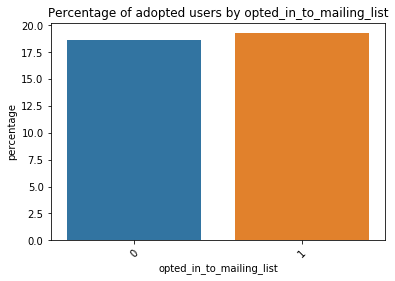

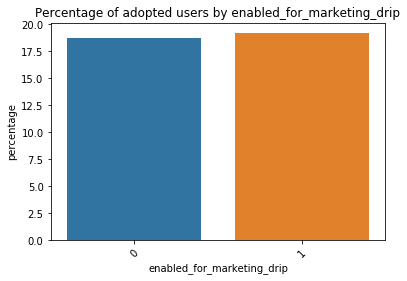

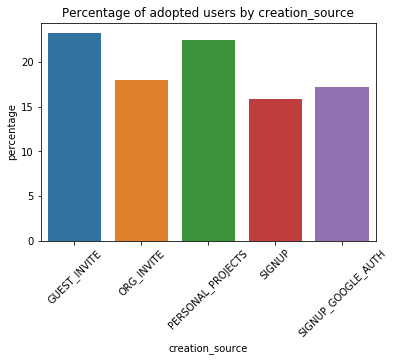

In [17]:
def visualize_pct(var_name, dataset):
    #we want to find the percentage of adopted users in each group as split by the given variable
    df = dataset.groupby(var_name).adopted_flag.value_counts()
    df = df.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index(name='percentage')
    plt.figure()
    sns.barplot(x=var_name, y='percentage', data=df.loc[df.adopted_flag == True])
    plt.xticks(rotation=45)
    plt.title(str("Percentage of adopted users by " + var_name))
    
visualize_pct('opted_in_to_mailing_list', users)    
visualize_pct('enabled_for_marketing_drip', users)    
visualize_pct('creation_source', users)  



Most of the variables don't have much of a significant relationship to adoption rates. Users who have opted into the mailing list and enabled for the marketing drip don't end up becoming adopted users at a rate differently from those who do not. There is more of a relationship between account creation source and adoption, where users who were invited by a guest or signed up for personal projects stay active more than users who sign up for other reasons. 

One limitation of our dataset is that there are relatively few variables which offer any deeper insight into the demographics or personal details about the users. It is possible to use some variables creatively as a proxy for this missing information, though. One such way is to look at the email provider each user has chosen - there may be differences between people who have chosen to use gmail vs yahoo which could also be reflected in their adoption rates. We'll pull the provider from the user's email addresses, keep any provider with at least 1000 records, and explore the results.

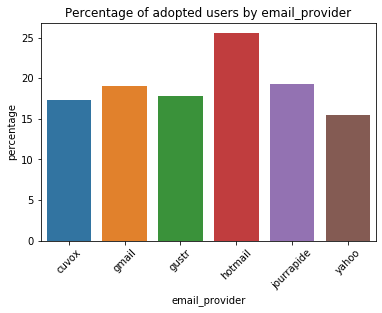

In [15]:
def email_split(email):
    #we want to find the part of the text between the @ and the . 
    split_1 = email.split('@')[1]
    split_2 = split_1.split('.')
    return(split_2[0])
users['email_provider'] = users.email.apply(email_split)

email_counts = users.email_provider.value_counts()
top_email_providers = email_counts.loc[email_counts > 1000]
#users.email_provider.isin(email_counts[0:10].index)
email_data = users.loc[users.email_provider.isin(top_email_providers.index)]

visualize_pct('email_provider', email_data)  


It turns out Hotmail users have the highest adoption rates, while all other email providers have similar rates. 

Having spent the suggested 1-2 hours and not wanting to go outside of the instruction's recommendations, I will mention one other idea for exploration. Similarly to how we used the email variable to extract deeper insight into user behavior, it could be worth exploring seeing their login times are related to adoption; do people who use our software primarily in the morning/afternoon/evening/all times throughout the day end up having different patterns?